# Part 1 
## Exercise 3: Temporal patterns

- To start off easily, let's count the number of crimes per year:
    - What is the year with most crimes?
    - What is the year with the fewest crimes?.
- Create a barplot of crimes-per-year (years on the x-axis, crime-counts on the y-axis).
- Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called *focus crimes*. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

## Loading Data 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Assignment-1/Data/SF_Crime_Data_Focus_Cleaned.csv', parse_dates=["Incident Date"])

## The year with the most and fewest crime from 2003 - 2025 

In [7]:
import pandas as pd

# Define current year for partial data
current_year = 2025

# Ensure the 'Incident Date' column is in datetime format
df["Incident Date"] = pd.to_datetime(df["Incident Date"])

# Count crimes per year
crimes_per_year = df["Incident Date"].dt.year.value_counts().sort_index()

# Crimes in incomplete year 2025
crimes_2025 = crimes_per_year.get(current_year, 0)

# Year with most crimes (excluding incomplete 2025)
year_most_crimes = crimes_per_year[crimes_per_year.index < current_year].idxmax()
num_most_crimes = crimes_per_year[year_most_crimes]

# Year with fewest crimes (excluding incomplete 2025)
year_fewest_crimes = crimes_per_year[crimes_per_year.index < current_year].idxmin()
num_fewest_crimes = crimes_per_year[year_fewest_crimes]

print(f"📅 Year with the most crimes: {year_most_crimes} ({num_most_crimes} crimes)")
print(f"📅 Year with the fewest crimes: {year_fewest_crimes} ({num_fewest_crimes} crimes)")

crimes_2025 = crimes_per_year.get(current_year, 0)
print(f"📅 Crimes in the incomplete year {current_year}: {crimes_2025}")


📅 Year with the most crimes: 2017 (93149 crimes)
📅 Year with the fewest crimes: 2024 (61322 crimes)
📅 Crimes in the incomplete year 2025: 5994


## Barplot for crime pr year 

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_84835/3702355666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette="Blues_d")


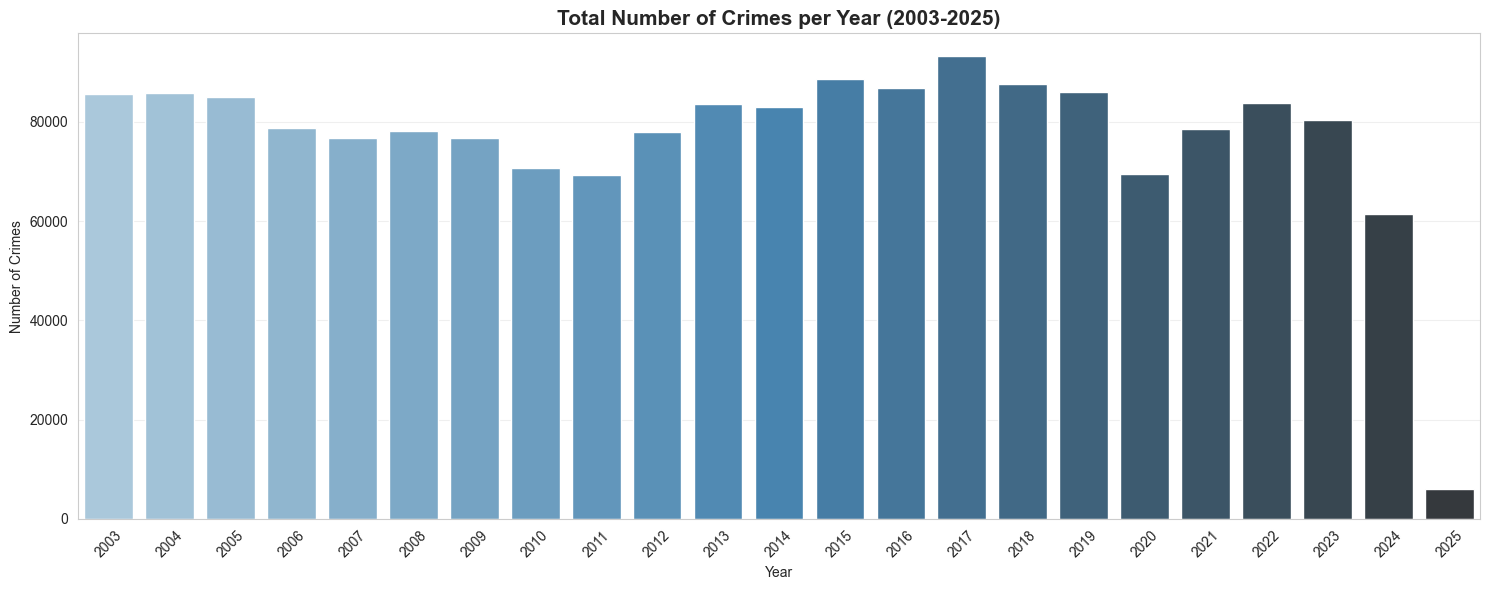

In [8]:
plt.figure(figsize=(15, 6))
sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, palette="Blues_d")

plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Total Number of Crimes per Year (2003-2025)", fontsize=15, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


The analysis of crime frequency from 2003 to 2025 shows a notable trend in the number of reported incidents over the years. The peak year for crime activity was 2017, with a significant 93,149 crimes recorded, making it the year with the highest number of incidents. After 2017, crime numbers began to decrease, with 2024 reaching the lowest crime count in the observed period, totaling 61,322 reported crimes.

As of 2025, data collection is ongoing, and the total number of crimes reported thus far is 5,994. Given that the year is not yet complete, these numbers are subject to change, but the current figures indicate a continued decline compared to previous years.

## Bar chart displaying the year-by-year development of each categories across the years 2003-2025.

/var/folders/lr/_ynnd4hs17b6vnnx6lbz3hzh0000gn/T/ipykernel_84835/1668584997.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus["Year"] = df_focus["Incident Date"].dt.year


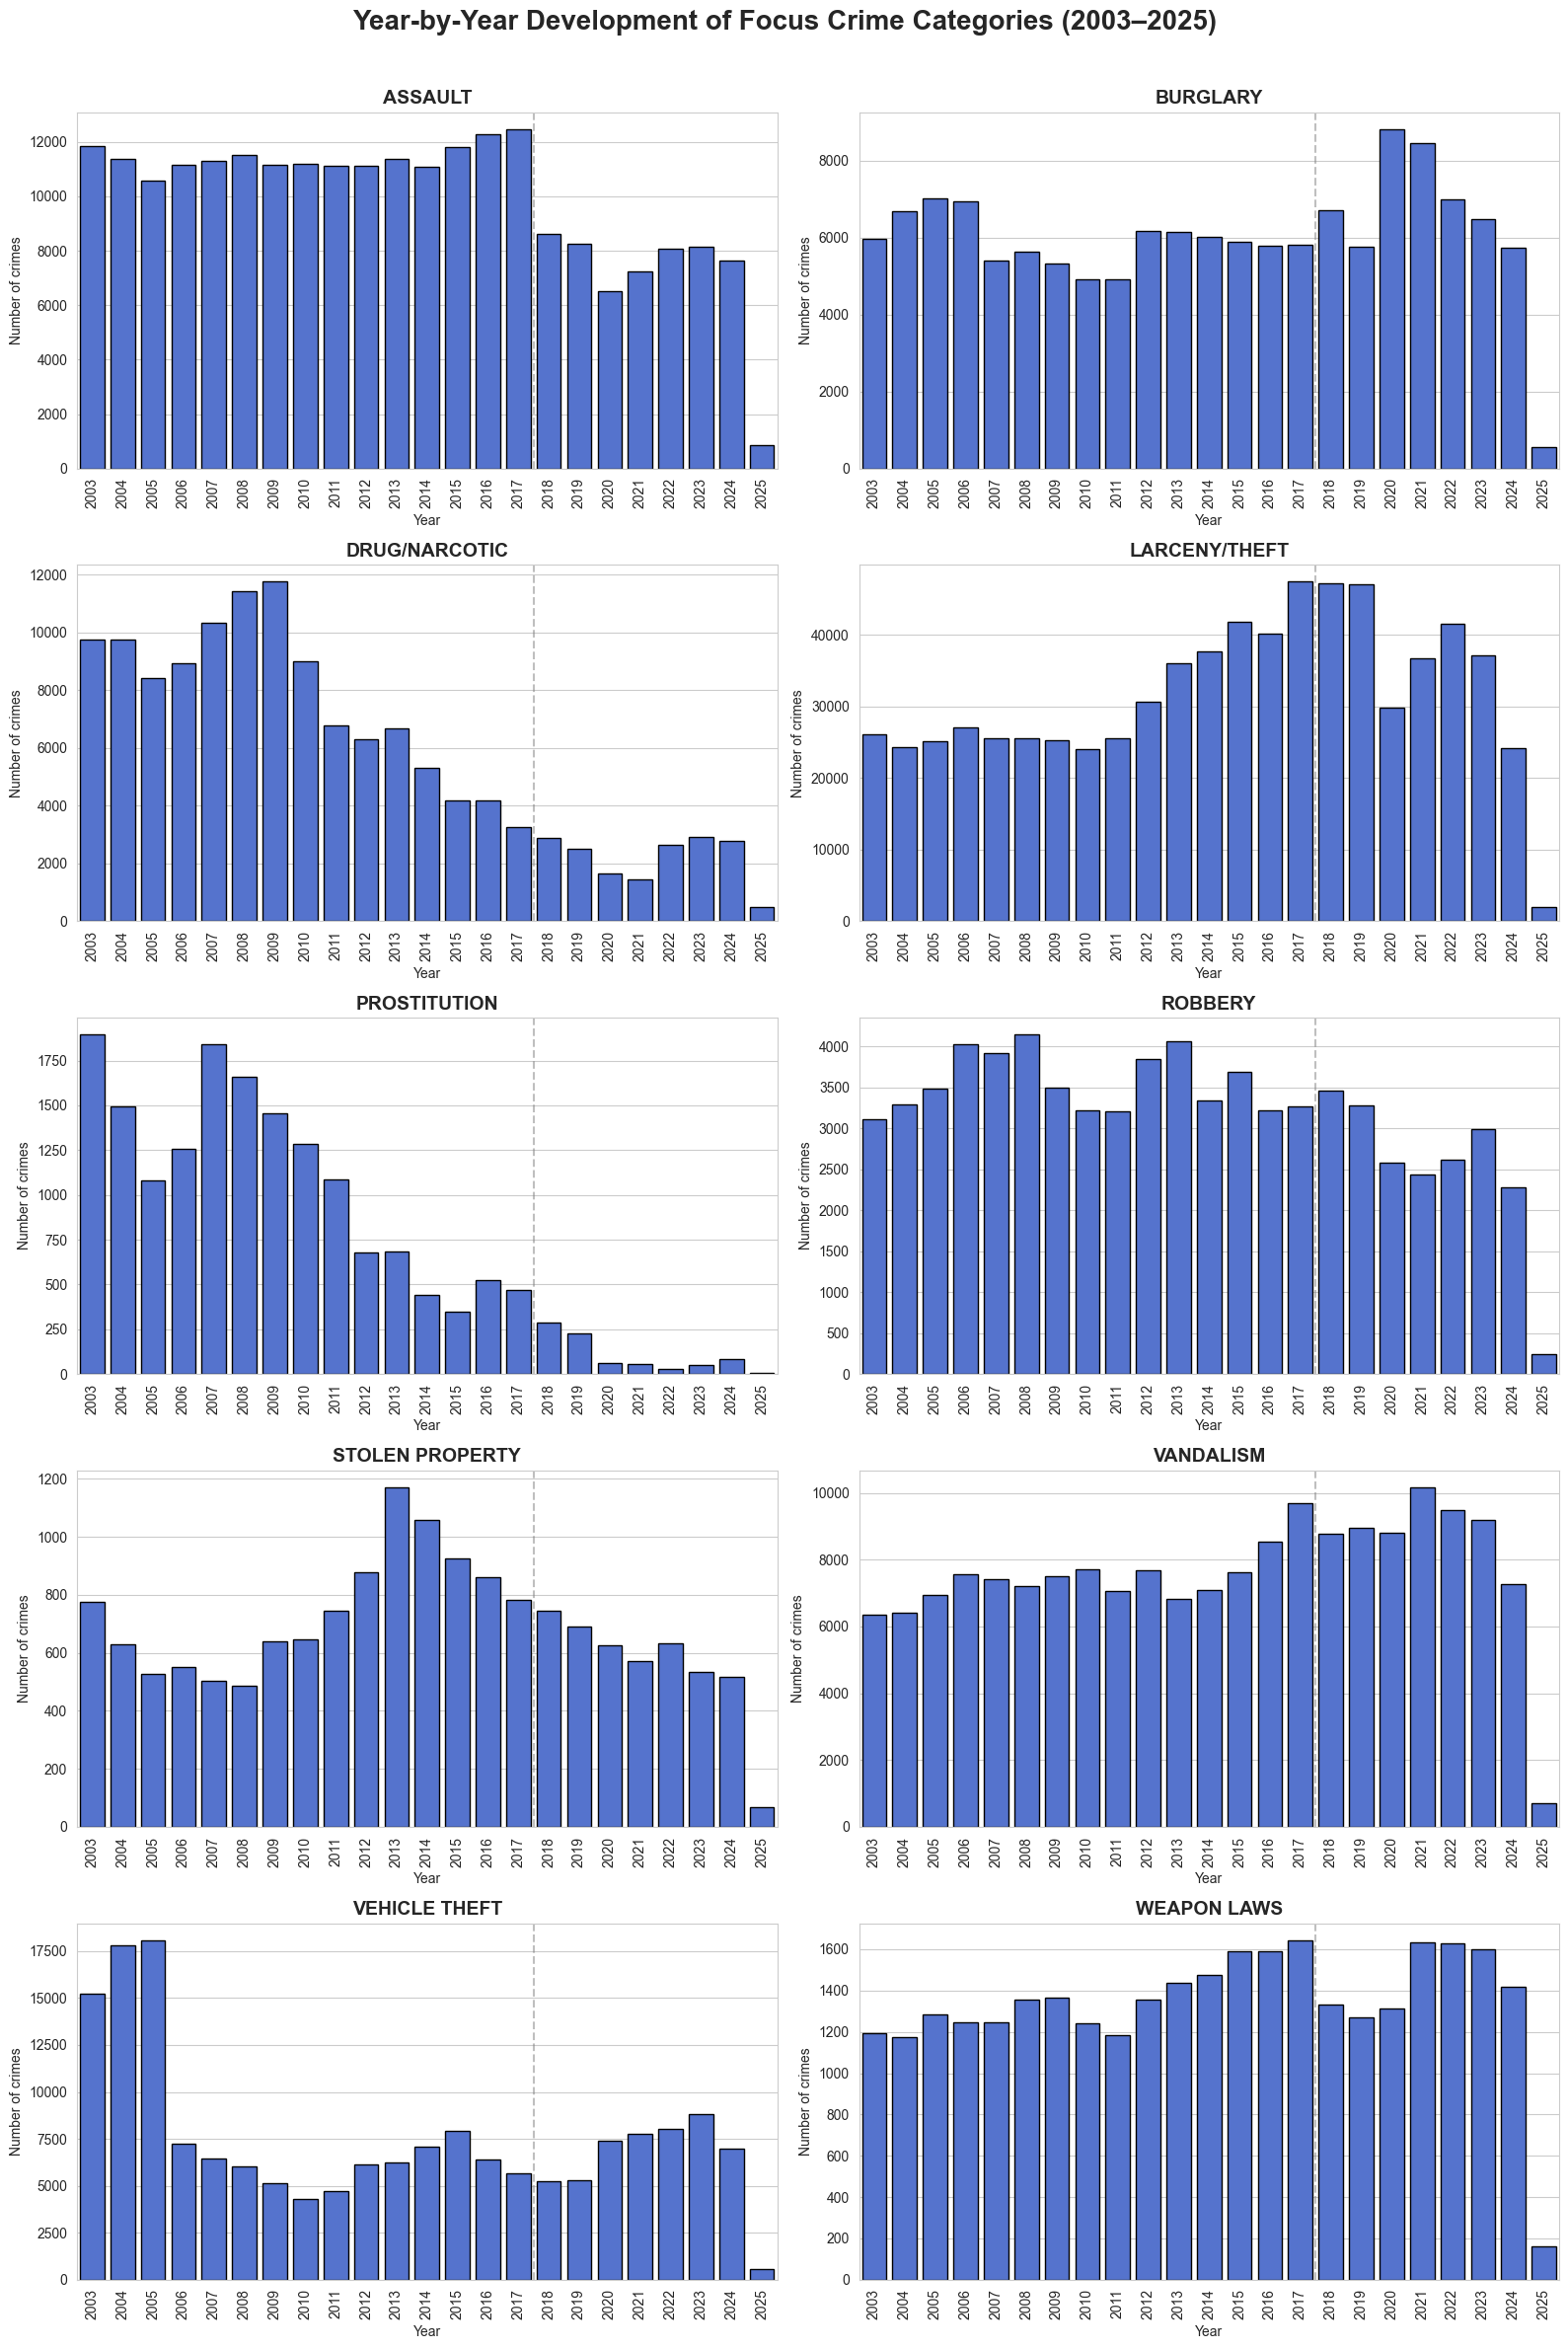

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

focuscrimes = [
    "WEAPON LAWS", "PROSTITUTION", "ROBBERY", "BURGLARY", "ASSAULT", 
    "DRUG/NARCOTIC", "LARCENY/THEFT", "VANDALISM", "VEHICLE THEFT", "STOLEN PROPERTY"
]

# Filter the dataframe to include only focus crimes
df_focus = df[df["Incident Category"].isin(focuscrimes)]
df_focus["Year"] = df_focus["Incident Date"].dt.year
crime_counts = df_focus.groupby(["Incident Category", "Year"]).size().reset_index(name="Count")

# Set up plotting environment
sns.set_style("whitegrid")
num_crimes = len(focuscrimes)
fig, axes = plt.subplots(nrows=num_crimes//2 + num_crimes % 2, ncols=2, figsize=(16, num_crimes*2.5))
axes = axes.flatten()

# Plot each crime category clearly and separately
for i, crime in enumerate(sorted(focuscrimes)):
    crime_data = crime_counts[crime_counts["Incident Category"] == crime]
    sns.barplot(ax=axes[i], x="Year", y="Count", data=crime_data, color="royalblue", edgecolor="black")
    axes[i].set_title(crime, fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of crimes")
    axes[i].tick_params(axis="x", rotation=90)

    # Add vertical dashed line marking dataset boundary at 2018
    if 2018 in crime_data["Year"].values:
        idx_2018 = crime_data[crime_data["Year"] == 2018].index[0] - crime_data.index[0] - 0.5
        axes[i].axvline(idx_2018, linestyle="--", color="gray", alpha=0.5)

if num_crimes % 2 != 0:
    fig.delaxes(axes[-1])

plt.suptitle("Year-by-Year Development of Focus Crime Categories (2003–2025)", fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


Looking at the year-by-year crime trends from 2003 to 2024, we notice distinct patterns for **Drug/Narcotic**, **Vehicle Theft**, and **Weapon Laws** offenses. 

**Drug/Narcotic** crimes peaked noticeably between 2007 and 2009, followed by a clear and consistent decline in subsequent years, likely indicating either decreased incidents or shifting enforcement strategies. In contrast, **Vehicle Theft** incidents were highest during 2004-2005, before dropping significantly. However, from 2016 onward, there's an evident upward trend, suggesting a resurgence of such crimes. Finally, crimes related to **Weapon Laws** stayed relatively stable across the years with slight fluctuations, notably rising around 2016-2017 and maintaining a higher rate in recent years.

Overall, these trends highlight important shifts in crime patterns, which may reflect changing societal factors, evolving law enforcement priorities, or external economic and policy influences. Further investigation into underlying causes would help in effectively addressing and mitigating these crimes.

# Part 2 

## Excercise: Data Visualization questions for the lecture.

- **What is the difference between data and metadata? How does that relate to the GPS tracks-example?**

    - The difference between data and metadata is that the data would be the actual 
    information collected so based on the GPS track-example the data would be the GPS 
    tracks showing the exact path taken while metadata data that provides information about other data so basically the date, time, device used, how they were record, or any description related to the GPS tracks.
    
- **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.**

    - We agree with the conclusion on the human eye is a great tool for data analysis. The human eye is very good at spotting patterns, trends, and irregularities, which helps when analyzing visual data like maps or graphs. However, it struggles when it comes to accurately estimating quantities when there are large amounts of data. This is because our brains are not naturally designed to count or measure with precision just by looking, especially if the data is complex or if there are too many points at once.

- **Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**
    
    - Imagine we have 2 hospitals. Hospital A & Hospital B. In Hospital A, 90% of severely ill patients survive, and 95% of mildly ill patients survive. While in Hospital B, 85% of severely ill patients survive, and 90% of mildly ill patients survive. Based on this Hospital A looks like the better / safer hospital. However what if we look on the overall survival rate, Hospital B might actually has a higher survival rate than Hospital A. This is because Hospital B might treat way more mildly ill patients (who have high survival rates) than severely ill ones. Meanwhile, Hospital A treats more severely ill patients, which drags down its overall average survival rate.

- **In your own words, explain the differnece between exploratory and explanatory data analysis.**
 
    - Exploratory data analysis, is when you explore the data, trying to understand its pattern, trends and possible connections. We are in the starting phase where the unknown is getting explored and researched, questions are being ask and ideas are forming. While Explanatory data analysis is when we already have a great understanding of the data as it has already been explored and test. We are in a phase where the research is completed and ready to be explained and presentet to others in a clear and structered way. 

## Exercise: Nice plots.

- **Create a list of 10 rules for nice plots based on the video.**

---

**1. Use subplots for comparable Data**
- Avoid endless scrolling with plot after plot.
- Combine related plots into subplots for better organization and comparability.

---

**2. Tight layout will give a better presentation**
- Use `tight_layout()` or similar tricks to reduce unnecessary whitespace and make plots fit better on a page.

---

**3. Always have labels on axes & legends**
- Every axis needs a clear label (with units if necessary), and all plots should have a legend if multiple data series exist.
- To make the plot much more meaningful.

---

**4. Use Meaningful Tick Marks & Values**
- Use meaningful values (e.g., whole weeks, round numbers) that make sense to the reader.

---

**5. Beware of Auto-Zoomed Axes (Y-Axis Cropping)**
- Plots should show the full range when appropriate.

---

**6. Match Axes in Subplots for Comparability**
- If you’re comparing datasets side by side, make sure the axes are the same across subplots.

---

**7. Maximize Data-Ink Ratio (Tufty Rule)**
- Show only the necessary information.
- No unnecessary gridlines, shadows, or decoration.

---

**8. Choose Good Fonts & Aesthetics**
- Use a clean font, makes the plots cleaner and nicer.

---

**9. Write Great Captions**
- Write a meaning caption, explain what the plot shows, what to look for in the data, etc.

---

**10. Think About Plot Context (Whole Story)**
- Combine title, labels, caption, and visual clarity to make your plot tell a story on its own.



# Part 3 
## Exploring other types of plots for temporal data
- Calendar plot 
- Polar bar chart



## Calendar plot 

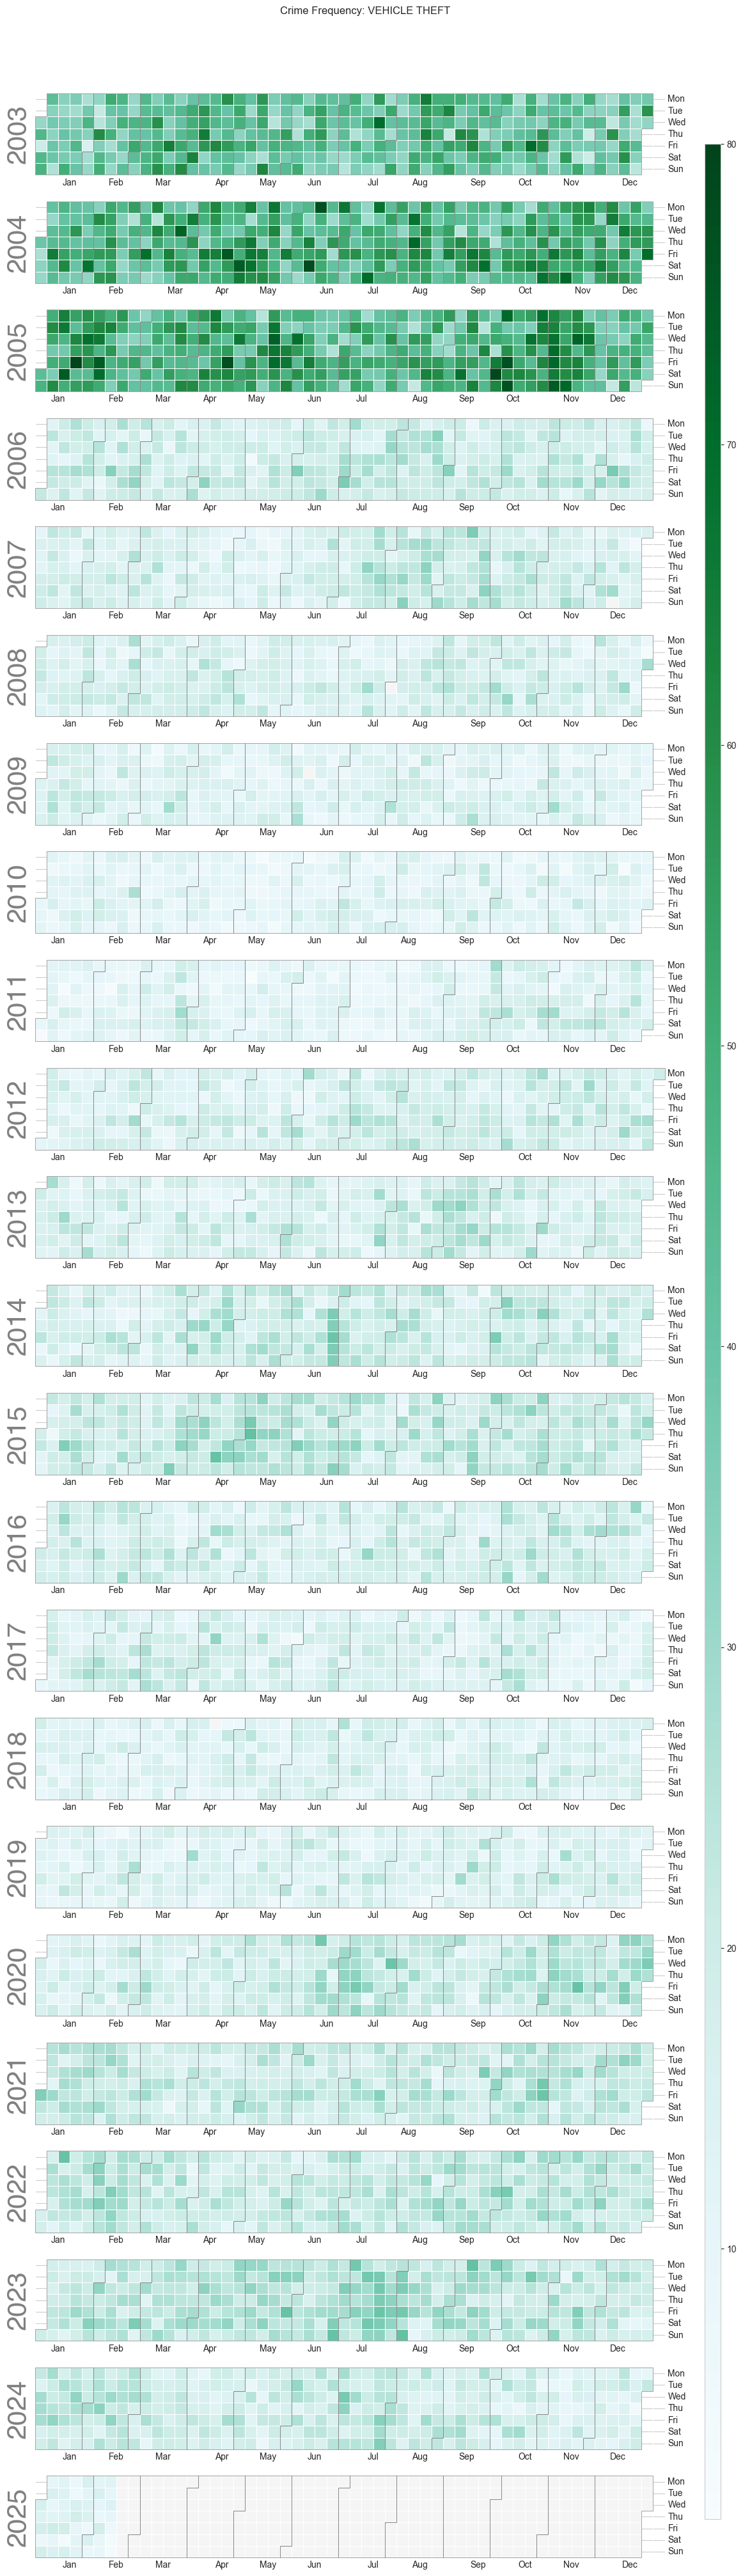

In [10]:
import calplot

# Select a specific crime type 
crime_type = "VEHICLE THEFT" 

# Aggregate crime counts per day for the selected crime type
crime_daily = df[df["Incident Category"] == crime_type].groupby("Incident Date").size()

# Plot the calendar heatmap
calplot.calplot(crime_daily, cmap="BuGn", colorbar=True, suptitle=f"Crime Frequency: {crime_type}", linewidth=0.5, dropzero=True, edgecolor="gray")

# Show the plot
plt.show()
